In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{u'height': 768, u'scroll': True, u'width': 1024}

<img src="ssr.png" alt="wali_476" width="400px"/>

# SSR Mining

### Team Members: Cody, Howell, Saeed, Shams, Nicholas, Michelle, Sunny, Mohammed, Sohrab

### Mentor: Junbo, Vien

# Problem Objective: Predicting Equipment Failure 

# Overview of Data:
 ## ~50 GB
 ## 20+ files
 
 


<img src="intro_ssr.png" alt="wali_476" width="900px"/>

<img src="data_ssr.png" alt="wali_476" width="900px"/>

<img src="data_net_ssr.png" alt="wali_476" width="700px"/>

# General exploration over all trucks

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploration of Best Truck

## The following shows the number of critical alarms received by each truck
## It is obtained by looking at the level 1 entries in Notification Details Report

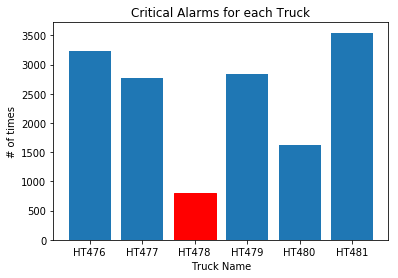

In [5]:
NDR = pd.read_csv('C:/Users/codyg/Desktop/BCData2018/Maintenance/NotificationDetailsReport.csv')
equipValues = NDR['Level'] # filtering Level
equipName = NDR['EquipmentName'] # filtering Truck Names
myDict = set(equipName) # finding the name of Trucks
myDictList = list(myDict) # set to list
Truck = [0]*len(myDictList) # Truck is a list of number 1 alarms
for i in range (len(equipValues)):
    if equipValues[i] == 1:
        current_Truck = myDictList.index(equipName[i])
        Truck[current_Truck] += 1

minCritical = Truck.index(min(Truck))
barlist = plt.bar(myDictList, Truck)
barlist[minCritical].set_color('r')
plt.title('Critical Alarms for each Truck')
plt.ylabel('# of times')
plt.xlabel('Truck Name')

del NDR

## seems 478 does a great job

## Truck Loads

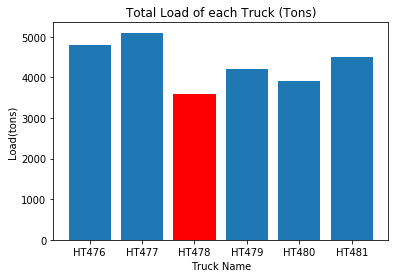

In [3]:
TPrS = pd.read_csv('C:/Users/codyg/Desktop/BCData2018//Production/TruckProductionSummary.csv')
equipNo = TPrS['EquipmentNumber']
Dict = set(equipNo)
DictList = list(Dict)
loadOfTrucks = TPrS['LoadTons']
TotalLoad = [0] * len(DictList)
for i in range (len(TotalLoad)):
    current_Truck = DictList.index(equipNo[i])
    TotalLoad[current_Truck] = TotalLoad[current_Truck] + loadOfTrucks[i]
    
minCritical = Truck.index(min(Truck))
barlist = plt.bar(DictList, TotalLoad)
barlist[minCritical].set_color('r')
plt.title('Total Load of each Truck (Tons)')
plt.ylabel('Load(tons)')
plt.xlabel('Truck Name')

del TPrS

## Seems to be promising, let's look at some other data

## Number of breakdowns

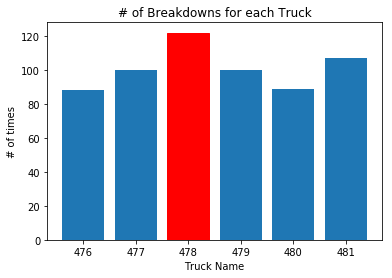

In [4]:
WO = pd.read_csv('C:/Users/codyg/Desktop/BCData2018/Maintenance/WorkOrders.csv')

probType = WO['PROBTYPE']

compID = WO['COMPID']

myDict = set(compID)

myDictList = list(myDict)

breakdownsNo = [0]*len(myDictList) # breakdownsNo is a list of number of breakdowns

for i in range (len(WO)):
    if probType[i] == 'Breakdown':
        current_Truck = myDictList.index(compID[i])
        breakdownsNo[current_Truck] += 1
        
maxBreakdowns = breakdownsNo.index(max(breakdownsNo))
        
barlist = plt.bar(myDictList, breakdownsNo)
barlist[maxBreakdowns].set_color('r')
plt.title('# of Breakdowns for each Truck')
plt.ylabel('# of times')
plt.xlabel('Truck Name')

del WO

## Not good! Let's look at number of accidents

## Number of Accidents

Text(0.5,0,'Truck Name')

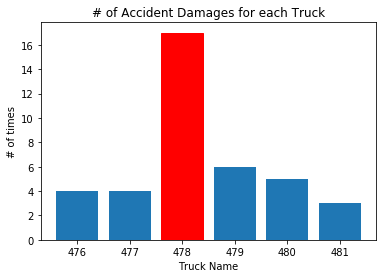

In [5]:
WO = pd.read_csv('C:/Users/codyg/Desktop/BCData2018/Maintenance/WorkOrders.csv')

probType = WO['PROBTYPE']

compID = WO['COMPID']

AccidentDamageNo = [0]*len(myDictList)

myDict = set(compID)

myDictList = list(myDict)
for i in range (len(WO)):
    if probType[i] == 'Accident Damage':
        current_Truck = myDictList.index(compID[i])
        AccidentDamageNo[current_Truck] += 1
        
maxAccidentDamage = AccidentDamageNo.index(max(AccidentDamageNo))
        
barlist = plt.bar(myDictList, AccidentDamageNo)
barlist[maxAccidentDamage].set_color('r')
plt.title('# of Accident Damages for each Truck')
plt.ylabel('# of times')
plt.xlabel('Truck Name')

## Not good either!

## Possible reasons:

## 1. Error in data
## 2. Some components provide multiple alarms in other trucks,
## hence more alarms in other trucks
## 3. Sometimes, truck drivers do not notice the alarms, which partly explains
## the reason behind huge numer of accidents and breakdowns

## Also:

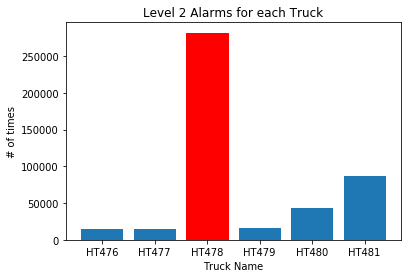

In [11]:
NDR = pd.read_csv('C:/Users/codyg/Desktop/BCData2018/Maintenance/NotificationDetailsReport.csv')

equipValues = NDR['Level'] # filtering Level

equipName = NDR['EquipmentName'] # filtering Truck Names

myDict = set(equipName) # finding the name of Trucks

myDictList = list(myDict) # set to list
        
Alarm2 = [0]*len(myDictList) # Alarm2 is a list of number 2 alarms
for i in range (len(equipValues)):
    if equipValues[i] == 2:
        current_Truck = myDictList.index(equipName[i])
        Alarm2[current_Truck] += 1
        
maxAlarm2 = Alarm2.index(max(Alarm2))

barlist = plt.bar(myDictList, Alarm2)
barlist[maxAlarm2].set_color('r')
plt.title('Level 2 Alarms for each Truck')
plt.ylabel('# of times')
plt.xlabel('Truck Name')


del NDR

## To Recap

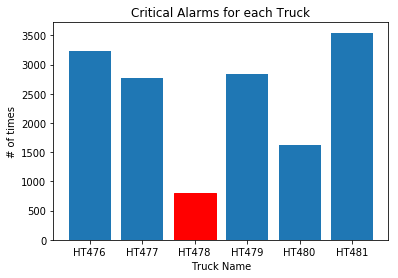

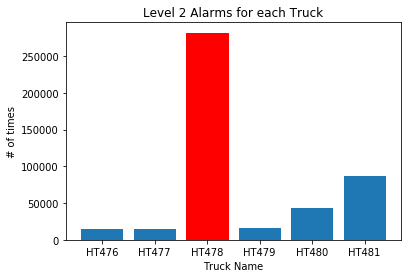

In [13]:
NDR = pd.read_csv('C:/Users/codyg/Desktop/BCData2018/Maintenance/NotificationDetailsReport.csv')

equipValues = NDR['Level'] # filtering Level

equipName = NDR['EquipmentName'] # filtering Truck Names

myDict = set(equipName) # finding the name of Trucks

myDictList = list(myDict) # set to list

Truck = [0]*len(myDictList) # Truck is a list of number 1 alarms

for i in range (len(equipValues)):
    if equipValues[i] == 1:
        current_Truck = myDictList.index(equipName[i])
        Truck[current_Truck] += 1
        
Alarm2 = [0]*len(myDictList) # Alarm2 is a list of number 2 alarms
for i in range (len(equipValues)):
    if equipValues[i] == 2:
        current_Truck = myDictList.index(equipName[i])
        Alarm2[current_Truck] += 1
        
minCritical = Truck.index(min(Truck))
maxAlarm2 = Alarm2.index(max(Alarm2))
        
plt.figure(1)
barlist = plt.bar(myDictList, Truck)
barlist[minCritical].set_color('r')
plt.title('Critical Alarms for each Truck')
plt.ylabel('# of times')
plt.xlabel('Truck Name')

plt.figure(2)
barlist = plt.bar(myDictList, Alarm2)
barlist[maxAlarm2].set_color('r')
plt.title('Level 2 Alarms for each Truck')
plt.ylabel('# of times')
plt.xlabel('Truck Name')


del NDR

## Conclusion:

## Truck 478 gives us something to think about. It is either the best truck or
## the worst truck depending on how we look at the data. It may also indicate
## that data might not reliable and we need more accurate data to make a 
## conclusive observation.

# Pressure and Temperature time series
<img src="wali_476.png" alt="wali_476" width="1000px"/>

<img src="wali_477.png" alt="wali_476" width="1100px"/>

<img src="wali_480.png" alt="wali_476" width="1100px"/>